<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-and-Metric" data-toc-modified-id="Exploratory-Data-Analysis-and-Metric-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis and Metric</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Submit" data-toc-modified-id="Submit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Submit</a></span></li><li><span><a href="#Homework" data-toc-modified-id="Homework-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Homework</a></span></li></ul></div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score

In [ ]:
SEED = 42

Папки создавал вручную и загружал архивы тоже вручную.

In [ ]:
DATA_PATH = './data/competition_data'

**[Kaggle InClass: Language Detection](https://www.kaggle.com/t/bb11ace54b1a465e91b8c3f46a840ce0)**

# Exploratory Data Analysis and Metric

In [ ]:
train_df = pd.read_csv(f'{DATA_PATH}/train.csv.zip')
test_df = pd.read_csv(f'{DATA_PATH}/test.csv.zip')

In [ ]:
train_df.shape, test_df.shape

((3159633, 2), (2784634, 2))

In [ ]:
# оставляю в трейне только уникальные строки 
train_df.drop_duplicates(inplace= True)

In [ ]:
train_df.head(15)

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
5,"Na primjer , pjesnik ga opisuje ovako .",hr
6,Semua rerumputan itu sekarang menutupi tanah s...,id
7,Det är en enorm utmaning för oss att göra det .,sv
8,Ono što ćete vidjeti - trebat ćete skočiti ovd...,hr
9,( Alqışlar ) Excel-dən istifadə etmişəm .,az


In [ ]:
train_df.shape

(2741628, 2)

In [ ]:
lang_count = (
    train_df.language.value_counts()
    .to_frame()
    .reset_index()
)

lang_count.head()

,index,language
0,en,130429
1,ar,108602
2,he,106957
3,ru,105230
4,ko,104060


In [ ]:
train_df.head(20)

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
5,"Na primjer , pjesnik ga opisuje ovako .",hr
6,Semua rerumputan itu sekarang menutupi tanah s...,id
7,Det är en enorm utmaning för oss att göra det .,sv
8,Ono što ćete vidjeti - trebat ćete skočiti ovd...,hr
9,( Alqışlar ) Excel-dən istifadə etmişəm .,az


Видно, что в датасете есть ошибки. Надо понять, как чистить предложения. Ячейку перезапустил уже после очистки, но там были всякие артефакты типо &#91,&quot,&apos. Просто смотрел разные строки из датасета и добавлял их в функцию cleaner, что-то убрал регулярными выражениями, но это не до конца помогло, потом просто рандомно опять прошелся и добавил Excel ну и на всякий Word в функцию.

Взял подвыборку датасета, в которой длина предложений превышает 1000 символов, на ней отладил функцию cleaner. Решил, что буду удалять из предложений все цифры и иные символы, которые бросяются в глаза при просмотре верхней ячейки.

In [ ]:
import re
def cleaner(st):
  return re.sub(r'(^\W+)|(\W+$)|(\d)|quot|apos|&|#|;|:|CG|СG|[-]|,|\.|\(|\)|\{|\}|\[|\]|\\|\/|—|，|一|»|«|"|„|’|Excel|Word|、','',st)


In [ ]:
lang = train_df.values[:, 1]
lang

array(['fr', 'cs', 'cs', ..., 'it', 'pt-br', 'fr-ca'], dtype=object)

In [ ]:
train_df = pd.DataFrame(train_df.sentence.apply(lambda x: cleaner(x)))

In [ ]:
train_df.insert(len(train_df.columns), column = 'lang', value = lang)

In [ ]:
train_df.head()

,sentence,lang
0,Pensez à la communication le discours les ge...,fr
1,Můžete si ji pronajmout vzít na splátky koup...,cs
2,Každý starosta pochopil že když mají tyto for...,cs
3,Det är ytterligare bevis men ändå Jag kritis...,sv
4,كان الأمر لا يصدق,ar


После чистки данных молги получиться строки, предложения в которых пустые.Удаляю их.

In [ ]:
train_df.drop(index=train_df[train_df.sentence == ''].index,inplace = True)

In [ ]:
train_df.shape

(2741522, 2)

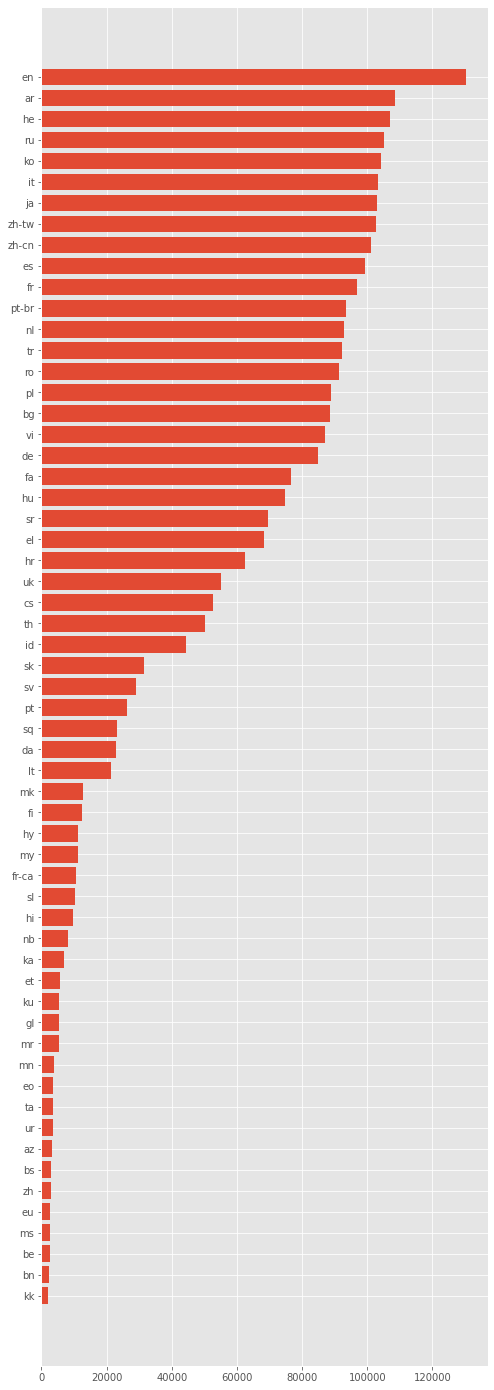

In [ ]:
fig, ax = plt.subplots(figsize=(8,25))

ax.barh(lang_count['index'], lang_count['language'])
ax.invert_yaxis();

In [ ]:
lang_count[lang_count['index'].apply(lambda x: x in {"en", "kk"})]

,index,language
0,en,130429
58,kk,2016


Датасет сильно не сбалансирован по классам, а требуется хорошее качество для всех языков, поэтому метрика в данном соревновании — взвешенная доля правильных ответов:

$$ 
\text{WeightedAccuracy}\left(y, \hat{y}, w\right) = \frac{\displaystyle{\sum_{i=1}^{n}} w_i \cdot \left(y_i == \hat{y}_i\right)}{\displaystyle\sum_{i=1}^{n} w_i } 
$$

Веса выбирались обратно пропорционально количеству примеров соответствующего языка:
$$
w\left(\text{"en"}\right) \sim \frac{1}{157655}
$$
$$ \dots $$
$$
w\left(\text{"kk"}\right) \sim \frac{1}{2046}
$$

Поэтому для валидации можно использовать [sklearn.metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)

# Model

In [ ]:
# убрал, тк в классификаторе можно задать class weight 'balanced', который расчитывается так же + нормируется на число строк
#weights_dict = dict(tr_df.language.value_counts().apply(lambda x: 1/x))

In [ ]:
# делаю стратификационную выборку из исходного датасета, тк коллаб падает из-за нехватки ОЗУ
N = round(train_df.shape[0]/10)
cropped_df = train_df.groupby('lang', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(train_df))))).sample(frac=1).reset_index(drop=True)

In [ ]:
lang_count_cropped = (
    cropped_df.lang.value_counts()
    .to_frame()
    .reset_index()
)



In [ ]:
lang_count_cropped.head()

,index,lang
0,en,13042
1,ar,10860
2,he,10695
3,ru,10522
4,ko,10406


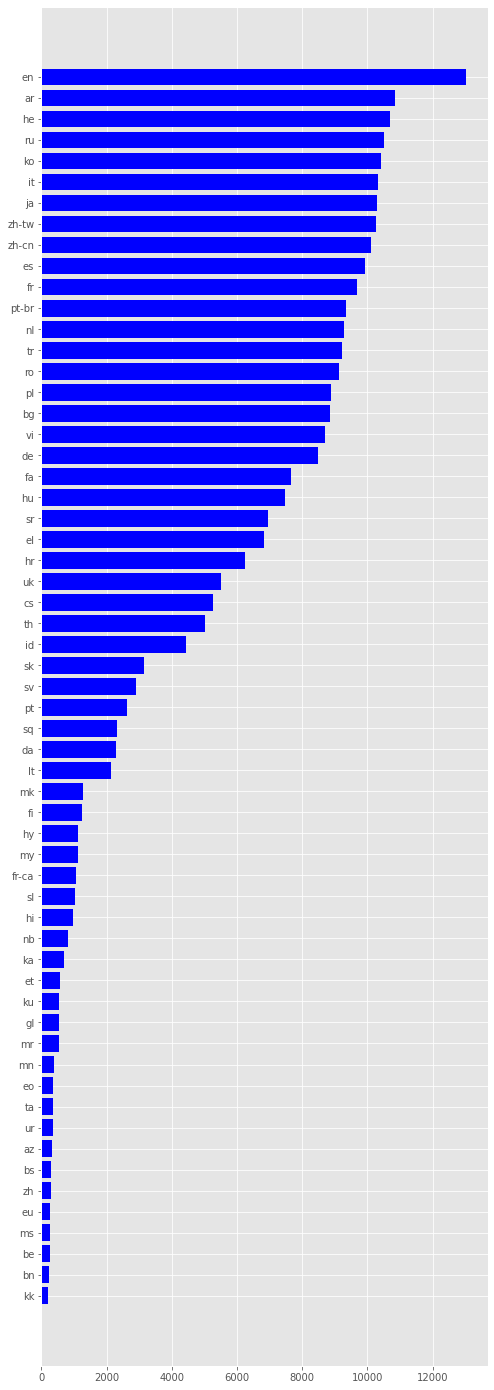

In [ ]:
fig, ax = plt.subplots(figsize=(8,25))
ax.barh(lang_count_cropped['index'], lang_count_cropped['lang'],color = 'b')
ax.invert_yaxis();

Построил гистограмму, чтобы показать, что пропорции по каждому классу соблюдены при переходе от исходного датасета к стратифицированной выборке. Она очень даже похожа на ту, что строилась по исходным данным.

In [ ]:
cropped_df

,sentence,lang
0,很好 。 酷 。 我要的是數量,zh-tw
1,Gözlerinizi açın Buna bakın,tr
2,คนส ่ วนใหญ ่ ที ่ อาศัยอยู ่ ที ่ นี ่ ไม ่ ว...,th
3,حسنا ، منذ ان كنت صغيرًا كنت أفكر في تأطير الم...,ar
4,זו היתה מין לולאת משוב חיובית לא מתוכננת בין ה...,he
...,...,...
274144,女子生徒に話を聞くと ファーストフード店で働くのが 人生の目標だと言うのです,ja
274145,Želim manje potraga u kojima je mom sinu rečen...,sr
274146,Donc on ne peut pas encore supprimer complète...,fr
274147,这是我们在办公室里进行的工作 。 事实上 这是实时运转的,zh-cn


In [ ]:
x = cropped_df.values[:, 0]
label_encoder = LabelEncoder().fit(cropped_df.values[:, 1])
y = label_encoder.transform(cropped_df.values[:, 1])

In [ ]:
# буду проверять модель на отложенной выборке
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [ ]:
# возможно, gridsearch найдет параметры оптимальнее этих, но я уже не успеваю засабмитить решение (сам виноват)
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(lowercase=True, ngram_range=(4, 6), analyzer='char', min_df=5, max_df=0.2)), # параметры взял рандомно, но по умному надо делать grid search
    ('model', SGDClassifier(random_state=SEED, loss='log', class_weight = 'balanced', n_jobs=-1))
],verbose = True)

In [ ]:
pipe.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total= 2.2min
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.2min


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.2, max_features=None,
                                 min_df=5, ngram_range=(4, 6), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                ('model',
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='opt

In [ ]:
predictions = pipe.predict(x_train)

In [ ]:
balanced_accuracy_score(y_train, predictions)

0.9253737760186612

In [ ]:
predictions2 = pipe.predict(x_test)

In [ ]:
balanced_accuracy_score(y_test, predictions2)

0.8725138292468171

# Submit

In [ ]:
test_df = pd.DataFrame(test_df.sentence.apply(lambda x: cleaner(x)))

In [ ]:
batch1 = test_df[:test_df.shape[0]//5]
batch2 = test_df[test_df.shape[0]//5:test_df.shape[0]*2//5]
batch3 = test_df[test_df.shape[0]*2//5:test_df.shape[0]*3//5]
batch4 = test_df[test_df.shape[0]*3//5:test_df.shape[0]*4//5]
batch5 = test_df[test_df.shape[0]*4//5:]

In [ ]:
prediction_batch1 = pipe.predict(batch1.sentence.values)
prediction_batch2 = pipe.predict(batch2.sentence.values)
prediction_batch3 = pipe.predict(batch3.sentence.values)
prediction_batch4 = pipe.predict(batch4.sentence.values)
prediction_batch5 = pipe.predict(batch5.sentence.values)

In [ ]:
batch1['language'] = label_encoder.classes_[prediction_batch1]
batch2['language'] = label_encoder.classes_[prediction_batch2]
batch3['language'] = label_encoder.classes_[prediction_batch3]
batch4['language'] = label_encoder.classes_[prediction_batch4]
batch5['language'] = label_encoder.classes_[prediction_batch5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
batch1.head()

,sentence,language
0,תודה לכם,he
1,Precisamos de compaixão para começar e autoin...,pt-br
2,這個增長相當大 並且它將引發經濟的增長,zh-tw
3,시애틀에서 자란 제가 처음 가난을 보게 되던 때를 기억해요,ko
4,これをロボットに組み込みました,ja


In [ ]:
submition = pd.concat([batch1, batch2, batch3, batch4, batch5])

In [ ]:
submition['index']=submition.index

In [ ]:
submition.shape

(2784634, 3)

In [ ]:
(
    submition[['index','language']].to_csv(f'{DATA_PATH}/final_sub.csv', index=False)
)

In [ ]:
!head $DATA_PATH/final_sub.csv

index,language
0,he
1,pt-br
2,zh-tw
3,ko
4,ja
5,zh-tw
6,hu
7,nl
8,ru


# Homework

- выбить хороший score на private leaderboard'е (8 баллов)
- совет: поищите ошибки в train-части датасета

Решал задание изменяя существующий код, все описано выше.